# Rotten Tomatoes Sentiment Analysis
Conducting sentiment analysis (pos/neg) on the Rotten Tomatoes dataset from HuggingFace.

## Setup

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# HuggingFace
import datasets

# Transformers
from transformers import AutoTokenizer

# Progress report
import tqdm

/Users/Anaqi_Amir/opt/anaconda3/envs/rotten_tomatoes/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Setting seeds
seed = 1234

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

## Load Data

In [2]:
# Load train, validation, and test data
train_data, validation_data, test_data = datasets.load_dataset("rotten_tomatoes",
                                                               split=["train", "validation", "test"])
train_data, validation_data, test_data

(Dataset({
     features: ['text', 'label'],
     num_rows: 8530
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 1066
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 1066
 }))

In [ ]:
# Checking data example
train_data[0]

In [ ]:
# Data features
train_data.features

## EDA

<Axes: xlabel='0'>

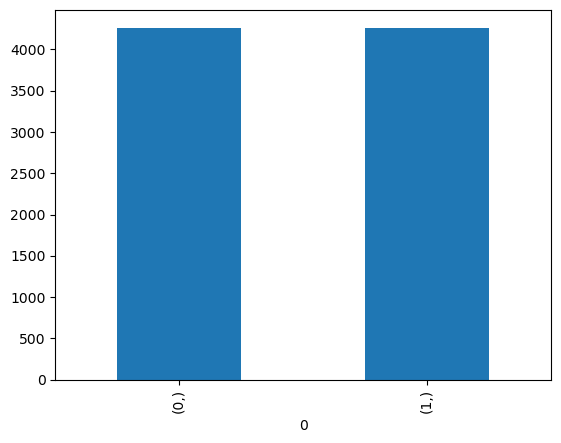

In [3]:
pd.DataFrame(train_data['label']).value_counts().plot(kind='bar')

We can see that there is an equal distribution between movies that have positive reviews and movies that have negative reviews in the training set.

## NLTK
We will use the NLTK library to conduct sentiment analysis.

In [ ]:
# Create instance of Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Example
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [11]:
# Another example
sia.polarity_scores("I am so sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

## Tokenizer

In [ ]:
# Create tokenizer from a pre-trained BERT model
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Use map function to tokenize entire dataset
train_data = train_data.map(lambda examples: tokenizer(examples["text"], return_tensors = 'np'), batched=True)

# Display example
train_data[0]

In [ ]:
# Data features after tokenizing
train_data.features